<a href="https://colab.research.google.com/github/LochanaBandara03/Vehicle-detection/blob/main/Vehicle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup the environment

In [34]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

##Load the pre trained model

In [35]:
model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1")

##Load input images or videos

Saving istockphoto-493574114-612x612.jpg to istockphoto-493574114-612x612 (5).jpg


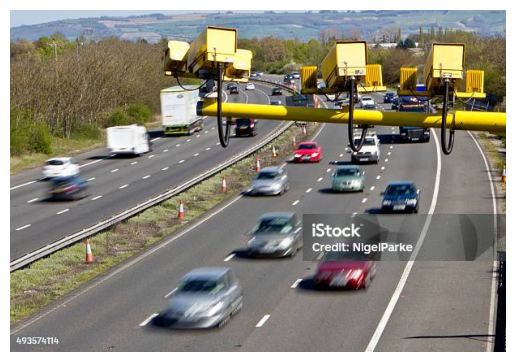

In [44]:
from google.colab import files
uploaded = files.upload()

#Read the images
for filename in uploaded.keys():
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

###Resize the image

In [45]:
input_tensor = tf.convert_to_tensor([img], dtype=tf.uint8)

##Vehicle detection

In [46]:
detections = model(input_tensor)

#Extract detection results
detection_scores = detections['detection_scores'].numpy()[0]
detection_classes = detections['detection_classes'].numpy()[0]
detection_boxes = detections['detection_boxes'].numpy()


Processing detection 0:
Raw box: [0.58885616 0.44563937 0.7277431  0.58984125]
Processing detection 0:
Raw box: [0.58885616 0.44563937 0.7277431  0.58984125]
Processing detection 1:
Raw box: [0.71062744 0.5748632  0.8250693  0.7361436 ]
Processing detection 1:
Raw box: [0.71062744 0.5748632  0.8250693  0.7361436 ]
Processing detection 2:
Raw box: [0.7518256  0.28008687 0.9293915  0.47245467]
Processing detection 2:
Raw box: [0.7518256  0.28008687 0.9293915  0.47245467]
Processing detection 3:
Raw box: [0.4615658  0.4804324  0.5455964  0.56344295]
Processing detection 3:
Raw box: [0.4615658  0.4804324  0.5455964  0.56344295]
Processing detection 4:
Raw box: [0.3860364 0.5665379 0.4498846 0.6291465]
Processing detection 4:
Raw box: [0.3860364 0.5665379 0.4498846 0.6291465]
Processing detection 5:
Raw box: [0.4566466 0.6404949 0.5381853 0.7152454]
Processing detection 5:
Raw box: [0.4566466 0.6404949 0.5381853 0.7152454]
Processing detection 6:
Raw box: [0.50303704 0.7459404  0.5970077  0

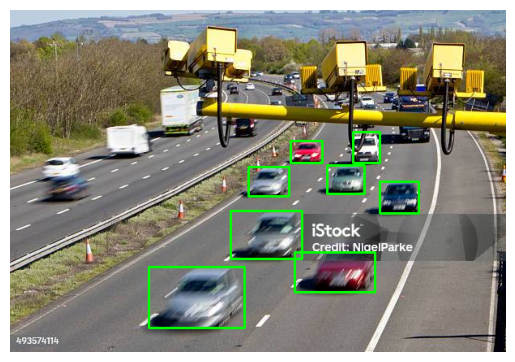

In [47]:
###Display detected vehicles
for i in range(len(detection_scores)):
  if detection_scores[i] > 0.5:
    class_id = int(detection_classes[i])
    box = detection_boxes[0][i]

    #Box structure
    print(f"Processing detection {i}:")
    print("Raw box:", box)

    print(f"Processing detection {i}:")
    print("Raw box:", box)

    #only vehicle classes
    if class_id in [3,6,8] :
      try:
        ymin, xmin, ymax, xmax = [float(coord) if hasattr(coord, 'item')
        else coord for coord in box[:4]]

        h, w, _ = img.shape
        ymin, xmin, ymax, xmax = (
            int(ymin * h), int(xmin * w), int(ymax * h), int(xmax * w)
        )

        start_point = (xmin, ymin)
        end_point = (xmax, ymax)
        color = (0, 255, 0)
        img = cv2.rectangle(img, start_point, end_point, color, 2)

      except Exception as e:
        print(f"Error processing detection {i}: {e}")
        continue

plt.imshow(img)
plt.axis('off')
plt.show()

